# toolbox.plot

### Import section

In [1]:
import sys

sys.path.insert(0, r"..")

import toolbox as tb

In [42]:
import datetime as dt

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

In [3]:
import plotly.offline
plotly.offline.init_notebook_mode()

### Enhance a function

In [17]:
@tb.plot.lineplot_advanced
def plot(*xy, add_trace=None, **kw_xy, ):
    add_trace(*xy, **kw_xy)

In [18]:
plot([0,4,6,7], [1,2,4,8],)

D:\Code\toolbox\demo\..\toolbox\plot.py:188: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



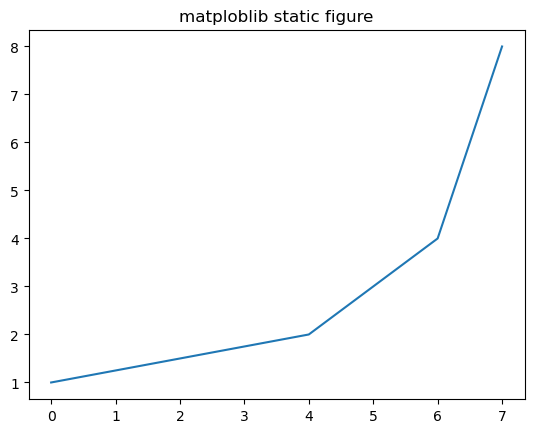

In [19]:
plot([0,4,6,7], [1,2,4,8], interactive=False, title="matploblib static figure")

In [20]:
# function must accept the keyword argument add_trace
# the only thing the function has to do, is to call add_trace
@tb.plot.lineplot_advanced
def plot_lines(samples=100, n=10, label="sigma={0}, mu={1}", add_trace=None):
    """
    Plot a line!

    Parameters
    ----------
    samples: int, optional
        Default 100
    n: int, optional
        Number of traces.
        Default: 10
    label: str, optional
        Trace label. May contain {0} for sigma and {1} for mu values.
        Default: "sigma={0}, mu={1}"
    [decorator parameters will be added automatically]
    """
    for i in range(1, n+1):
        add_trace(np.random.normal(i*10,i,samples), label=label.format(i, i*10))

In [21]:
# function now accepts their own arguments,
# and plot-styling arguments
plot_lines(samples=200, title="Normally distributed Noise")

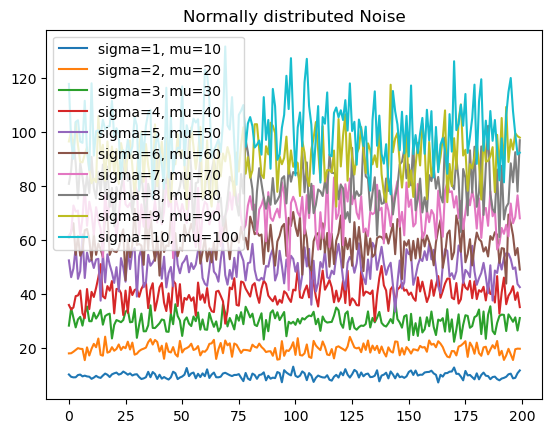

In [22]:
# function now accepts their own arguments,
# and plot-styling arguments
plot_lines(samples=200, interactive=False, title="Normally distributed Noise")

In [23]:
@tb.plot.histplot_advanced
def plot_hists(samples=100, n=10, label="sigma={0}, mu={1}", add_trace=None):
    """
    Plot a line!

    Parameters
    ----------
    x_max: int, optional
    [decorator parameters]
    """
    for i in range(1, n+1):
        add_trace(np.random.normal(i*10,i,samples), label=label.format(i, i*10))

In [24]:
plot_hists(samples=10000, title="It really is normally distrubuted!")

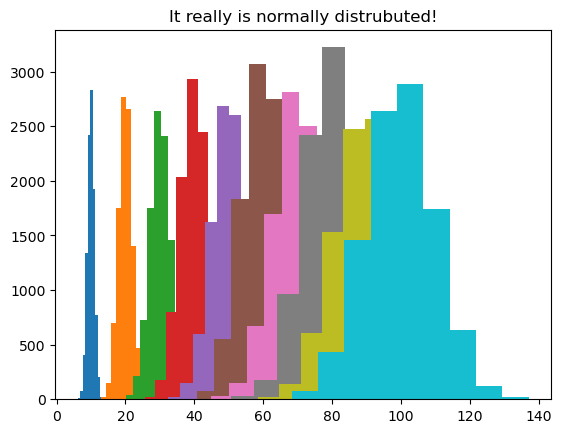

In [25]:
plot_hists(samples=10000, interactive=False, title="It really is normally distrubuted!")

### Enhance class methods

In [4]:
class SignalAnalysis(tb.plot.NotebookInteraction):
    """A generic example to import (aka simulate) and show data easily."""

    def __init__(self, samples=1000):
        # read or simulate your data
        self.data = np.random.normal(0,1,samples)
        self.index = pd.date_range(dt.datetime.now() - dt.timedelta(seconds=samples), dt.datetime.now(), samples)

    @tb.plot.lineplot_advanced
    def plot(self, add_trace):
        """
        Show this beauty of a graph!

        Parameters
        ----------
        [decorator parameters will be added automatically]
        """
        add_trace(self.index, self.data, )

    @tb.plot.histplot_advanced
    def hist(self, add_trace):
        """
        Show this beauty of a histogram!

        Parameters
        ----------
        [decorator parameters will be added automatically]
        """
        add_trace(self.data, )

    @tb.plot.lineplot_static
    def plot_static(self, add_trace=None):
        """
        Show this beauty of a graph!

        Enforce static matplotlib graphs.

        Parameters
        ----------
        [decorator parameters will be added automatically]
        """
        add_trace(self.index, self.data, )

    @tb.plot.lineplot_dynamic
    def plot_dynamic(self, add_trace=None):
        """
        Show this beauty of a graph!

        Enforce dynamic plotly graphs.

        Parameters
        ----------
        [decorator parameters will be added automatically]
        """
        add_trace(self.index, self.data, )

    def show(
        self,
        *args,
        title="Random Noise Generator",
        **kwargs,
    ):
        """Display the plot with your predefined standard settings."""
        return self.plot(
            *args,
            title=title,
            **kwargs,
        )

In [5]:
# The tb.plot.NotebookInteraction parent class allows initialisation and automatic display with one line
SignalAnalysis()

In [6]:
# for more functionality, keep the instsance...
signal = SignalAnalysis()

In [7]:
# raw, user-configurable plot
signal.plot(title="plotly backend (default)")

D:\Code\toolbox\demo\..\toolbox\plot.py:188: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



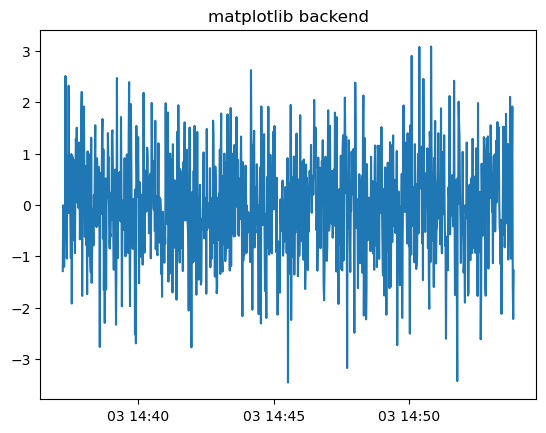

In [8]:
# raw, user-configurable plot
signal.plot(interactive=False, title="matplotlib backend")

In [9]:
# show default annotated plot
signal.show()

In [10]:
# automatic html representation with _repr_html_()
signal

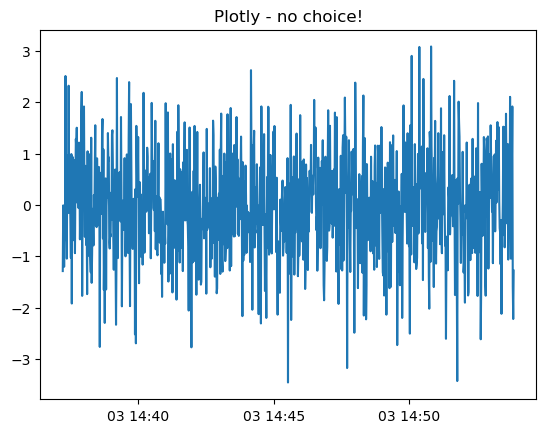

In [11]:
# disable dynamic plots
signal.plot_static(title="Plotly - no choice!")

# disable static plots
signal.plot_dynamic(title="Matplotlib - no choice!")

In [12]:
# histogram
signal.hist()

In [31]:
# control all of plotly by passing keyword argumends for plotly's fig.update_layout
signal.hist(
    title="Fully controllable layout!",
    pty_update_layout=dict(plot_bgcolor="black")
)

In [38]:
# take even more control with the custom function
def pty_custom_func(fig):
    fig.update_traces(opacity=0.75)
    return fig

signal.hist(
    title="custom function",
    pty_custom_func=pty_custom_func,
)

In [49]:
plt.grid?

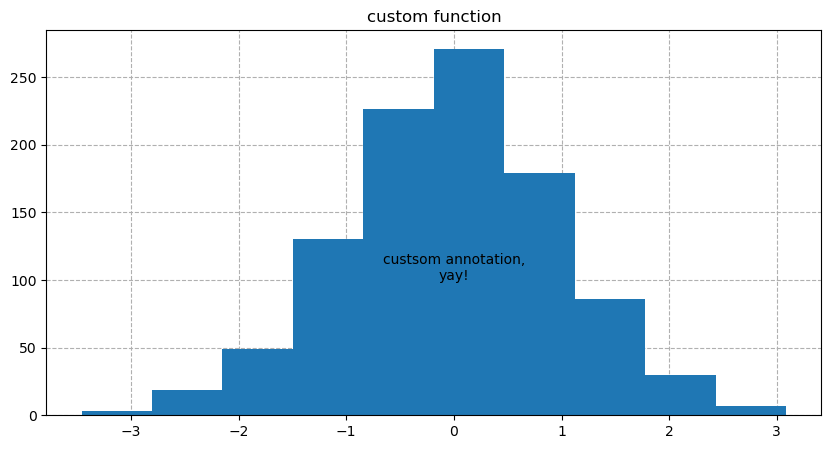

In [60]:
# take even more control with the custom function
def mpl_custom_func(fig, ax):
    ax.set_axisbelow(True)
    ax.text(0, 100, "custsom annotation,\nyay!", horizontalalignment="center")
    ax.grid(linestyle="--", zorder=10)
    return fig, ax

signal.hist(
    title="custom function",
    fig_size=(10,5),
    interactive=False,
    mpl_custom_func=mpl_custom_func,
)

In [44]:
# save plot
signal.show().save("exports/signal_plotly.html")
signal.show(interactive=False).save("exports/signal_mpl.png")
signal.show().save("exports/signal_plotly.png")
plt.close()